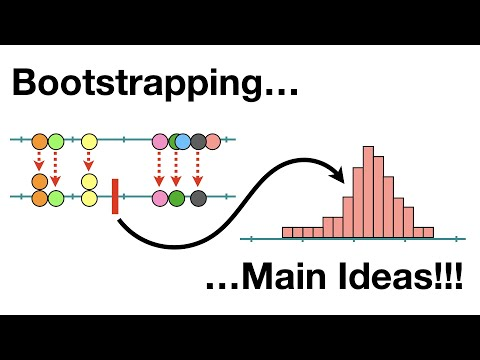

In [56]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=900, height=500)

# 1:

The **"standard error of the mean"** measures how much the sample mean is expected to vary from every sample to sample, basically capturing the accuracy of the sample mean as an estimate of the population mean. It's based on the spread of bootstrapped means or calculated from the standard deviation divided by the square root of the sample size.

The **"standard deviation,"** on the other hand, shows the variability within the original dataset itself, indicating how spread out individual data points are from the sample mean.

# 2:

To create a 95% confidence interval using the "standard error of the mean", you take the sample mean and add and subtract about 2 times the standard error of the mean. The 2 comes from the normal distribution and ensures that the interval covers 95% of possible sample means, assuming the data follows a roughly normal distribution. So, the formula is: 

sample mean ± (about)2 × standard error of the mean.

# 3:

To create a 95% bootstrapped confidence interval directly from the bootstrapped means, you’d sort them and then take the values at the 2.5th and 97.5th percentiles. This range would capture the middle 95% of the bootstrapped means, giving you an interval without needing to use the standard error.

# 4:

In [6]:
import numpy as np

# Generate a 10000 random bootstrapped samples of 30 random numbers as random sample data
# then calculate the mean of each sample, and store the results in the bootstrap_means list
np.random.seed(0)
sample_size = 30
random_sample = np.random.normal(loc=50, scale=10, size=sample_size)
n_iterations = 10000
bootstrap_means = np.empty(n_iterations)

for i in range(n_iterations):
    bootstrap_sample = np.random.choice(random_sample, size=sample_size, replace=True)
    # To calculate the median here instead of mean, for example, "...np.mean..." should be replaced with "...np.median..."
    bootstrap_means[i] = np.mean(bootstrap_sample)

# Determine the 95% confidence interval by finding the 2.5th and 97.5th percentiles
# of the distribution of bootstrapped means
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)
confidence_interval = (lower_bound, upper_bound)
print(confidence_interval)

(50.44329758520025, 58.23728331308564)


# 5:


We need to distinguish between population and sample statistics because the confidence interval is a range around the sample statistic that estimates where the true population parameter might fall. The sample gives us a snapshot, but we're ultimately trying to say something or making an estimation about the larger population.

### Chatbot Summary Thus Far:

In this thread, I provided code to generate a 95% bootstrap confidence interval for a population mean based on a random sample. The code utilized the NumPy library to create a random sample from a normal distribution, perform bootstrap resampling, and calculate the confidence interval. I also explained how to modify the code to produce a confidence interval for a different population parameter, such as the median, by replacing the mean function with the median function in the resampling process.

Additionally, I discussed the importance of distinguishing between the population parameter and the sample statistic when interpreting confidence intervals, highlighting key aspects such as definition, variability, inference, interpretation, and the assessment of bias and error. This distinction is crucial for accurately communicating statistical results and understanding the reliability of estimates.

##### ChatGPT Link: https://chatgpt.com/share/66ff5847-63a0-8003-9e83-eda68dbbc3fd

# 6:

**6.1**

Bootstrapping is like taking your data and moving it around until you get a better sense of what it’s telling you. You take your original sample and randomly pick data points from it, letting them repeat, to create lots of "new" samples. This way, you can estimate things like averages or confidence intervals without needing to gather more data.

**6.2**

The main purpose of bootstrapping is to help us understand how reliable our sample estimates are. By creating many different samples, we can see how much those estimates vary and get a better picture of the uncertainty around them.

**6.3**

So let’s say you think the average of a population is 50. You’d take your sample and use bootstrapping to create lots of new samples. For each of these samples, you’d calculate the average. Then, you’d see how many of these averages are around your guessed average of 50. If a lot of them are close to 50, that means your guess is probably close or right, but if most of them are off, it means that the average is not close to 50 and your estimate was incorrect.

# 7:

A confidence interval overlapping zero indicates that the observed effect could include no effect at all, meaning we lack strong evidence against the null hypothesis, which suggests no average effect. Even if the sample mean is not zero, the overlap with zero shows that the sample could be due to random variation. However, if the confidence interval does not overlap zero, it suggests that the observed effect is statistically significant, leading us to reject the null hypothesis and conclude there is an average effect.

# 8:

We want to find out if the vaccine really helps improve health scores. First, we calculate how much each patient’s health improved by subtracting their Initial Health Score from their Final Health Score.

Next, we use bootstrapping to get a better sense of the average improvement. This means we’ll take lots of random samples from our data to see how the average change varies. We’ll then create a 95% confidence interval from these samples. If this interval doesn’t include zero, it suggests that the vaccine likely has a positive effect on health.

In [53]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
data = pd.read_csv('vaccine_data.csv')


data['HealthScoreChange'] = data['FinalHealthScore'] - data['InitialHealthScore']
n_iterations = 1000
bootstrapped_means = []
np.random.seed(0)
for _ in range(n_iterations):
    sample = np.random.choice(data['HealthScoreChange'], size=len(data), replace=True)
    bootstrapped_means.append(np.mean(sample))

# Calculate the confidence interval
conf_interval = np.percentile(bootstrapped_means, [2.5, 97.5])

# Check if the confidence interval overlaps with zero
if conf_interval[0] > 0:
    conclusion = "The vaccine is effective (reject the null hypothesis)."
elif conf_interval[1] < 0:
    conclusion = "The vaccine is effective (reject the null hypothesis)."
else:
    conclusion = "The vaccine is not effective (fail to reject the null hypothesis)."

print(f"Confidence Interval: {conf_interval}")
print(conclusion)


Confidence Interval: [0.9 5.5]
The vaccine is effective (reject the null hypothesis).


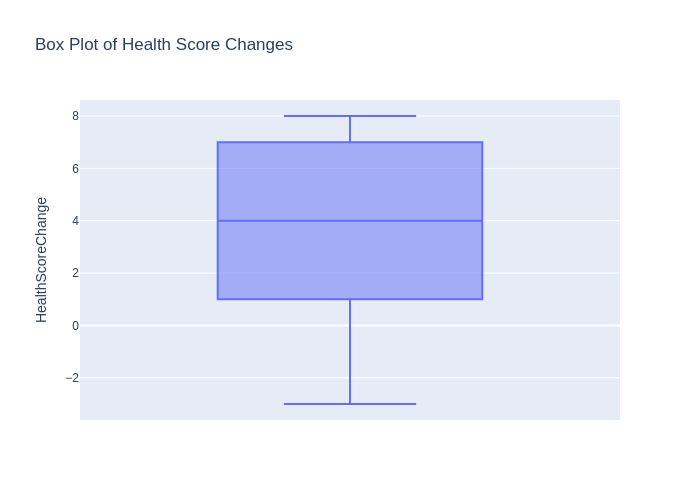

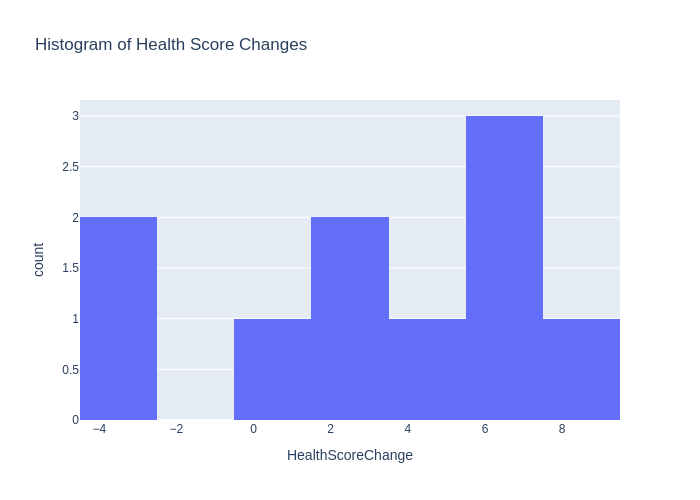

In [55]:
import plotly.express as px

# Create box plot
fig = px.box(data, y='HealthScoreChange', title='Box Plot of Health Score Changes')
fig.show(renderer="png")

# Create histogram
fig2 = px.histogram(data, x='HealthScoreChange', nbins=10, title='Histogram of Health Score Changes')
fig2.show(renderer="png")

#### Conclusion:
Based on my bootstrapping analysis, the confidence interval for the average health improvement doesn’t include zero. This means we can reject the null hypothesis of "no effect," suggesting that the vaccine likely has a positive impact on health scores. The data supports that the vaccine is effective in improving health outcomes.

# 9: Yes